# Fundamentals Company Geographic Sales Breakdown

Refinitiv's Reuters Fundamentals has over 35 years of experience in collecting and delivering the most timely and highestquality fundamentals data in the industry, including an unmatched depth and breadth of primary financial statements, footnote items, segment data, industry specific operating metrics, financial ratios, and much more. 

Reuters Fundamentals standardized and As Reported financial statement data – both interim and annual – along with per-share data, calculated financial ratios, company profile information, security data, Officers & Directors and market content for over 90,000 issuers. 


## Business & Geographic Segments

Reuters Fundamentals also contains information for each segment reported by a company on an annual and interim basis Global coverage. This information which let you drive down your interested comapny sale revenue of each region.

This [classic Jupyter Notebook](https://jupyter.org/) uses Refinitiv [Eikon Data API](https://developers.refinitiv.com/eikon-apis/eikon-data-api) to consume company geographic sale data from Refinitiv Fundamentals, then breakdown and display each region revenue in readable graph format.


## Eikon Data API Setup

Please follow a step by step guide to setup your Eikon Data API and your AppKey in [Eikon Data API Quick Start page](https://developers.refinitiv.com/eikon-apis/eikon-data-api/quick-start). 

Please note that you can also create your Appkey via <a href="https://amers1.apps.cp.thomsonreuters.com/apps/AppkeyGenerator">AppKey Generator web site</a>.

In [1]:
#Imporint Eikon and Main Modules

import eikon as ek
import configparser as cp
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as tick
from matplotlib.ticker import FuncFormatter


warnings.filterwarnings('ignore')

## Connecting to Eikon Data API

This code sets the `app_id` to connect to the **Eikon Data API** via the **Refinitiv Workspace/Eikon Desktop Application** which needs to be running locally. It requires the previously created text file `eikon.cfg` to be in the current working directory.

You should save a text file with **filename** `eikon.cfg` having the following contents:

    [eikon]
    app_id = YOUR_APP_ID_HERE
    
This file should be readily availble (e.g. in the current working directory) for the next steps.

In [2]:
cfg = cp.ConfigParser()
cfg.read('eikon.cfg')  # adjust for different file location

['eikon.cfg']

Please note that the Refintiv Workspace/Eikon application integrates a Data API proxy that acts as an interface between the Eikon Data API Python library and the Eikon Data Platform. For this reason, the Refinitiv Workspace/Eikon application must be running when you use the Eikon Data API Python library. 

In [3]:
ek.set_app_key(cfg['eikon']['app_id']) #set_app_id function being deprecated

## Data API Fields

<!--
The fields providing geographic breakdown of the company's fundamentals are
- ```TR.BGS.GeoTotalRevenue```
- ```TR.BGS.GeoTotalRevenue.segmentName```
-->

This Company fundamentals information can be search in Refinitiv Workspace (or Eikon desktop) Data Item Browser application under ```Content Classification -> Reuters Fundamentals -> Business and Geographic Segments - Geographic Segment```.

<img src="images/rw_data_item_browser_2.png">

<!--
### TR.BGS.GeoTotalRevenue
Geographic Total Revenues (Calculated). 
* Value unit: Millions-->


Firstly we get the list of interested RICs from index RIC. We use Dow Jones Industrial Average (RIC ```0#.DJI```) as an example.

In [4]:
chain_ric = '0#.DJI'

Then we use Eikon Data API ```get_data``` function to get a list of RICs and Company names inside interested index RIC.

In [5]:
data, err = ek.get_data(chain_ric,['TR.CompanyName'])
data

,Instrument,Company Name
0,GS.N,Goldman Sachs Group Inc
1,NKE.N,Nike Inc
2,CSCO.OQ,Cisco Systems Inc
3,JPM.N,JPMorgan Chase & Co
4,DIS.N,Walt Disney Co
5,INTC.OQ,Intel Corp
6,DOW.N,Dow Inc
7,MRK.N,Merck & Co Inc
8,CVX.N,Chevron Corp
9,AXP.N,American Express Co


Next, we get a list of RICs for the first 5 rows of returned Dataframe object.

In [6]:
rics = data.head()['Instrument'].tolist()
rics

['GS.N', 'NKE.N', 'CSCO.OQ', 'JPM.N', 'DIS.N']

Next, we get Company Geographic Sale data of each RIC and ploting a graph. Starting with the first RIC from Dow Jones Industrial Average index.

In [7]:
rics[0]

'GS.N'

## How to get Company Geographic Sale Data

Firstly, we use Eikon Data API's ```get_data``` function to request the following fields:
- TR.BGS.GeoTotalRevenue.segmentName: Segment (Geographic) data
- TR.BGS.GeoTotalRevenue: Each segment revenue value
- TR.CompanyName

In [8]:
df,err = ek.get_data(rics[0], ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue','TR.CompanyName'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated),Company Name
0,GS.N,Americas,22148000000,Goldman Sachs Group Inc
1,GS.N,"Europe, Middle East and Africa",9745000000,
2,GS.N,Asia,4653000000,
3,GS.N,Segment Total,36546000000,
4,GS.N,Consolidated Total,36546000000,


Then, we rename *Segment Name* and *Geographic Total Revenues (Calculated)* columns to readable names like *Geographic* and *Revenue*.

In [9]:
df_graph = df.copy()

df_graph.rename(columns={
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Revenues'},
         inplace = True)

df_graph

,Instrument,Geographic,Revenues,Company Name
0,GS.N,Americas,22148000000,Goldman Sachs Group Inc
1,GS.N,"Europe, Middle East and Africa",9745000000,
2,GS.N,Asia,4653000000,
3,GS.N,Segment Total,36546000000,
4,GS.N,Consolidated Total,36546000000,


The returned Dataframe object from ```get_data``` function contains the summary revenue sale values in Segment's *Segment Total* and *Consolidated Total* rows.

We will use the *Consolidated Total* information as a summary sale value in this notebook. We get this sale from the last row of Dataframe.

In [10]:
total_sale = df_graph.iloc[df_graph.shape[0] - 1]['Revenues']
total_sale

36546000000

Get the company name information from the first row of Dataframe object which is the only row that contains *Company Name* column data.

In [11]:
company_name = df_graph.iloc[0]['Company Name']
company_name


'Goldman Sachs Group Inc'

Remove total sale rows from Dataframe object before ploting a graph.

In [12]:
df_graph = df_graph[df_graph['Geographic'] != 'Segment Total']
df_graph = df_graph[df_graph['Geographic'] != 'Consolidated Total']

Then we define a function for formatting sale number values. The function receives incoming large revenue numbers from Notebook, then reformats that value into a readable numbers in trillions, billions or millions unit.

This code is based on [Dan Friedman](https://github.com/frieds/frieds.github.io)'s [How to Format Large Tick Values tutorial](https://github.com/frieds/frieds.github.io/tree/master/data-visualizations/how_to_format_large_tick_values_files) source code via GitHub.

In [13]:
def format_revenues_number(tick_val, pos):
    """
    Turns large tick values (in the trillions, billions, millions and thousands) such as 4500 into 4.5K 
    and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000000: # Add support for trillions
        val = round(tick_val/1000000000000, 1)
        new_tick_format = '{:}T'.format(val)
    elif tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

     # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    """
    code below will keep 4.5M as is but change values such as 4.0M to 4M since that 
    zero after the decimal isn't needed
    """
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

Finally, we draw a bar graph.

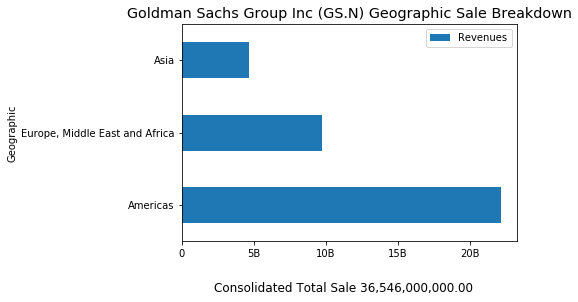

In [14]:
# Plotting a Graph

df_graph.set_index('Geographic',drop=True,inplace=True)
fig = plt.figure()

#Format Total Sale display unit as a graph footer.
fig.text(.5, -.05, 'Consolidated Total Sale %s' %(f'{total_sale:,.2f}'), ha='center',fontsize='large')

# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('%s (%s) Geographic Sale Breakdown' % (company_name, rics[0]), color='black',fontsize='x-large')
ax = fig.gca()

#Apply Sale data into millions function.
formatter = FuncFormatter(format_revenues_number)
ax.xaxis.set_major_formatter(formatter)

df_graph.plot(kind='barh', ax = fig.gca())
plt.show()

Continue the next RIC, getting Company Fundamentals Data.

In [15]:
rics[1]

'NKE.N'

In [16]:
# Get Company fundamentals data via Eikon.get_data function

df,err = ek.get_data(rics[1], ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue','TR.CompanyName'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated),Company Name
0,NKE.N,Asia Pacific & Latin America-Other,0,Nike Inc
1,NKE.N,Asia Pacific & Latin America-Footwear,3622000000,
2,NKE.N,Asia Pacific & Latin America-Equipment,237000000,
3,NKE.N,Asia Pacific & Latin America-Apparel,1395000000,
4,NKE.N,"Europe, Middle East, Africa-Other",0,
5,NKE.N,"Europe, Middle East, Africa-Footwear",6293000000,
6,NKE.N,"Europe, Middle East, Africa-Equipment",432000000,
7,NKE.N,"Europe, Middle East, Africa-Apparel",3087000000,
8,NKE.N,Greater China-Other,0,
9,NKE.N,Greater China-Footwear,4262000000,


In [17]:
# Get Company Name

company_name = df.iloc[0]['Company Name']
company_name

'Nike Inc'

In [18]:
# Change Dataframe object columns to be readable names.

df_graph = df.copy()

df_graph.rename(columns={
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Revenues'},
         inplace = True)

df_graph

,Instrument,Geographic,Revenues,Company Name
0,NKE.N,Asia Pacific & Latin America-Other,0,Nike Inc
1,NKE.N,Asia Pacific & Latin America-Footwear,3622000000,
2,NKE.N,Asia Pacific & Latin America-Equipment,237000000,
3,NKE.N,Asia Pacific & Latin America-Apparel,1395000000,
4,NKE.N,"Europe, Middle East, Africa-Other",0,
5,NKE.N,"Europe, Middle East, Africa-Footwear",6293000000,
6,NKE.N,"Europe, Middle East, Africa-Equipment",432000000,
7,NKE.N,"Europe, Middle East, Africa-Apparel",3087000000,
8,NKE.N,Greater China-Other,0,
9,NKE.N,Greater China-Footwear,4262000000,


In [19]:
# Get Consolidate Total Sale summary value

total_sale = df_graph.iloc[df_graph.shape[0] - 1]['Revenues']
total_sale

39117000000

In [20]:
# Remove unused rows before ploting a grah

df_graph = df_graph[df_graph['Geographic'] != 'Segment Total']
df_graph = df_graph[df_graph['Geographic'] != 'Consolidated Total']

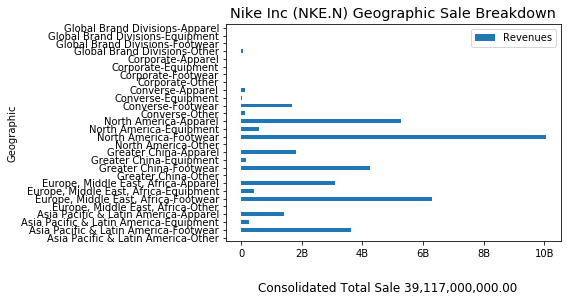

In [21]:
# Plotting a Graph

df_graph.set_index('Geographic',drop=True,inplace=True)

fig = plt.figure()
#Format Total Sale display unit.
fig.text(.5, -.05, 'Consolidated Total Sale %s' %(f'{total_sale:,.2f}'), ha='center',fontsize='large')

plt.ticklabel_format(style = 'plain')
plt.title('%s (%s) Geographic Sale Breakdown' % (company_name, rics[1]), color='black',fontsize='x-large')
ax = fig.gca()

#Apply Sale data into millions function.
formatter = FuncFormatter(format_revenues_number)
ax.xaxis.set_major_formatter(formatter)

df_graph.plot(kind='barh', ax = fig.gca())
plt.show()

Continue the next ric.

In [22]:
rics[2]

'CSCO.OQ'

In [23]:
# Get Company fundamentals data via Eikon.get_data function

df,err = ek.get_data(rics[2], ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue','TR.CompanyName'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated),Company Name
0,CSCO.OQ,Americas,3527000000,Cisco Systems Inc
1,CSCO.OQ,Europe/Middle East/Africa,13100000000,
2,CSCO.OQ,APJC,7877000000,
3,CSCO.OQ,United States,27400000000,
4,CSCO.OQ,Segment Total,51904000000,
5,CSCO.OQ,Consolidated Total,51904000000,


In [24]:
# Get Company Name

company_name = df.iloc[0]['Company Name']
company_name

'Cisco Systems Inc'

In [25]:
# Change Dataframe object columns to be readable names.

df_graph = df.copy()

df_graph.rename(columns={
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Revenues'},
         inplace = True)

df_graph

,Instrument,Geographic,Revenues,Company Name
0,CSCO.OQ,Americas,3527000000,Cisco Systems Inc
1,CSCO.OQ,Europe/Middle East/Africa,13100000000,
2,CSCO.OQ,APJC,7877000000,
3,CSCO.OQ,United States,27400000000,
4,CSCO.OQ,Segment Total,51904000000,
5,CSCO.OQ,Consolidated Total,51904000000,


In [26]:
# Get Total Sale summary value

total_sale = df_graph.iloc[df_graph.shape[0] - 1]['Revenues']
total_sale

51904000000

In [27]:
# Remove unused rows before ploting a grah

df_graph = df_graph[df_graph['Geographic'] != 'Segment Total']
df_graph = df_graph[df_graph['Geographic'] != 'Consolidated Total']

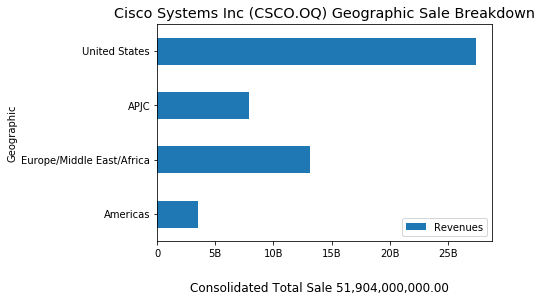

In [28]:
# Plotting a Graph

df_graph.set_index('Geographic',drop=True,inplace=True)

fig = plt.figure()
#Format Total Sale display unit.
fig.text(.5, -.05, 'Consolidated Total Sale %s' %(f'{total_sale:,.2f}'), ha='center',fontsize='large')

plt.ticklabel_format(style = 'plain')
plt.title('%s (%s) Geographic Sale Breakdown' % (company_name, rics[2]), color='black',fontsize='x-large')
ax = fig.gca()

#Apply Sale data into millions function.
formatter = FuncFormatter(format_revenues_number)
ax.xaxis.set_major_formatter(formatter)

df_graph.plot(kind='barh', ax = fig.gca())
plt.show()

Next we try list of interested RICs from Nikkei Index (RIC ```0#.N225```) as an example.

In [29]:
chain_ric = '0#.N225'

Then we use Eikon Data API ```get_data``` function to get a list of RICs and Company names inside interested index RIC.

In [30]:
data, err = ek.get_data(chain_ric,['TR.CompanyName'])
data

,Instrument,Company Name
0,6857.T,Advantest Corp
1,8267.T,Aeon Co Ltd
2,5201.T,AGC Inc
3,2802.T,Ajinomoto Co Inc
4,6770.T,Alps Alpine Co Ltd
...,...,...
220,9064.T,Yamato Holdings Co Ltd
221,6506.T,Yaskawa Electric Corp
222,6841.T,Yokogawa Electric Corp
223,5101.T,Yokohama Rubber Co Ltd


In [31]:
rics = data.head()['Instrument'].tolist()
rics

['6857.T', '8267.T', '5201.T', '2802.T', '6770.T']

Try the first Nikkei Index RIC.

In [32]:
rics[0]

'6857.T'

Getting company fundamental data.

In [33]:
# Get Company fundamentals data via Eikon.get_data function

df,err = ek.get_data(rics[0], ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue','TR.CompanyName'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated),Company Name
0,6857.T,Japan,14881000000,Advantest Corp
1,6857.T,Americas,13579000000,
2,6857.T,Europe,7124000000,
3,6857.T,Asia,246872000000,
4,6857.T,Segment Total,282456000000,
5,6857.T,Consolidated Total,282456000000,


Get company name.

In [34]:
# Get Company Name

company_name = df.iloc[0]['Company Name']
company_name

'Advantest Corp'

Then we rename *Segment Name* and *Geographic Total Revenues (Calculated)* columns to readable names like *Geographic* and *Revenue*

In [35]:
df_graph = df.copy()

df_graph.rename(columns={
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Revenues'},
         inplace = True)

df_graph

,Instrument,Geographic,Revenues,Company Name
0,6857.T,Japan,14881000000,Advantest Corp
1,6857.T,Americas,13579000000,
2,6857.T,Europe,7124000000,
3,6857.T,Asia,246872000000,
4,6857.T,Segment Total,282456000000,
5,6857.T,Consolidated Total,282456000000,


Get Consolidate Total sales value.

In [36]:
total_sale = df_graph.iloc[df_graph.shape[0] - 1]['Revenues']
total_sale

282456000000

Remove total sale rows from Dataframe object before ploting a grah. 

In [37]:
df_graph = df_graph[df_graph['Geographic'] != 'Segment Total']
df_graph = df_graph[df_graph['Geographic'] != 'Consolidated Total']

And then ploting a graph from Dataframe object.

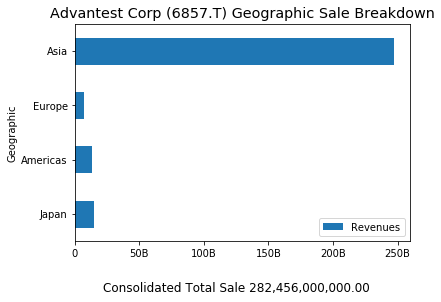

In [38]:
# Plotting a Graph

df_graph.set_index('Geographic',drop=True,inplace=True)
fig = plt.figure()

#Format Total Sale display unit as a graph footer.
fig.text(.5, -.05, 'Consolidated Total Sale %s' %(f'{total_sale:,.2f}'), ha='center',fontsize='large')

# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('%s (%s) Geographic Sale Breakdown' % (company_name, rics[0]), color='black',fontsize='x-large')
ax = fig.gca()

#Apply Sale data into millions function.
formatter = FuncFormatter(format_revenues_number)
ax.xaxis.set_major_formatter(formatter)

df_graph.plot(kind='barh', ax = fig.gca())
plt.show()

Next Nikkei Index RIC.

In [39]:
rics[1]

'8267.T'

In [40]:
# Get Company fundamentals data via Eikon.get_data function

df,err = ek.get_data(rics[1], ['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue','TR.CompanyName'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated),Company Name
0,8267.T,Japan,7757433000000,Aeon Co Ltd
1,8267.T,China (Country),278952000000,
2,8267.T,ASEAN,365741000000,
3,8267.T,Undetermined Geography,116088000000,
4,8267.T,Segment Total,8518214000000,
5,8267.T,Consolidated Total,8518214000000,


In [41]:
# Get Company Name

company_name = df.iloc[0]['Company Name']
company_name

'Aeon Co Ltd'

In [42]:
# Change Dataframe object columns to be readable names.

df_graph = df.copy()

df_graph.rename(columns={
                   'Segment Name':'Geographic',
                   'Geographic Total Revenues (Calculated)':'Revenues'},
         inplace = True)

df_graph

,Instrument,Geographic,Revenues,Company Name
0,8267.T,Japan,7757433000000,Aeon Co Ltd
1,8267.T,China (Country),278952000000,
2,8267.T,ASEAN,365741000000,
3,8267.T,Undetermined Geography,116088000000,
4,8267.T,Segment Total,8518214000000,
5,8267.T,Consolidated Total,8518214000000,


In [43]:
# Get Consolidate Total Sale summary value

total_sale = df_graph.iloc[df_graph.shape[0] - 1]['Revenues']
total_sale

8518214000000

In [44]:
# Remove unused rows before ploting a grah

df_graph = df_graph[df_graph['Geographic'] != 'Segment Total']
df_graph = df_graph[df_graph['Geographic'] != 'Consolidated Total']

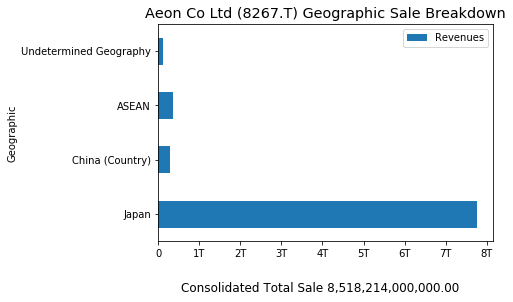

In [45]:
# Plotting a Graph

df_graph.set_index('Geographic',drop=True,inplace=True)
fig = plt.figure()

#Format Total Sale display unit as a graph footer.
fig.text(.5, -.05, 'Consolidated Total Sale %s' %(f'{total_sale:,.2f}'), ha='center',fontsize='large')

# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('%s (%s) Geographic Sale Breakdown' % (company_name, rics[1]), color='black',fontsize='x-large')
ax = fig.gca()

#Apply Sale data into millions function.
formatter = FuncFormatter(format_revenues_number)
ax.xaxis.set_major_formatter(formatter)

df_graph.plot(kind='barh', ax = fig.gca())
plt.show()

## Conclusion

Refinitiv provides a wide range of Reuters Fundamentals data for your investment decisions including company geographic sale information. This information helps you analysis the revenue from each geographic region of your interested company in both panel data and graph formats.

## References
* [Refinitiv Eikon Data API page](https://developers.refinitiv.com/eikon-apis/eikon-data-api) on the [Refinitiv Developer Community](https://developers.refinitiv.com/) web site.
* [Eikon Data API Quick Start Guide page](https://developers.refinitiv.com/eikon-apis/eikon-data-api/quick-start).
* [Eikon Data API Tutorial page](https://developers.refinitiv.com/eikon-apis/eikon-data-api/learning).
* [Python Quants Video Tutorial Series for Eikon API](https://community.developers.refinitiv.com/questions/37865/announcement-new-python-quants-video-tutorial-seri.html).
* [Eikon Data APY Python Reference Guide](https://docs-developers.refinitiv.com/1584688434238/14684/book/en/index.html).
* [Eikon Data API Troubleshooting article](https://developers.refinitiv.com/article/eikon-data-apipython-troubleshooting-refinitiv).
* [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html).
* [Pyplot Graph API Reference](https://matplotlib.org/api/pyplot_api.html).

For any question related to this example or Eikon Data API, please use the Developers Community [Q&A Forum](https://community.developers.refinitiv.com/spaces/92/eikon-scripting-apis.html).